In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Helvetica'

In [2]:
df = pd.read_csv('pizza_sales_data.csv')
df.head(10)

,order_details_id,order_id,pizza_id,quantity,size,price,total_price,name,pizza_type_id,category,ingredients,order_time
0,1,1,hawaiian_m,1,Medium,13.25,13.25,The Hawaiian Pizza,hawaiian,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36
1,2,2,classic_dlx_m,1,Medium,16.00,16.00,The Classic Deluxe Pizza,classic_dlx,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01 11:57:40
2,3,2,five_cheese_l,1,Large,18.50,18.50,The Five Cheese Pizza,five_cheese,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01 11:57:40
3,4,2,ital_supr_l,1,Large,20.75,20.75,The Italian Supreme Pizza,ital_supr,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01 11:57:40
4,5,2,mexicana_m,1,Medium,16.00,16.00,The Mexicana Pizza,mexicana,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01 11:57:40
5,6,2,thai_ckn_l,1,Large,20.75,20.75,The Thai Chicken Pizza,thai_ckn,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",2015-01-01 11:57:40
6,7,3,ital_supr_m,1,Medium,16.50,16.50,The Italian Supreme Pizza,ital_supr,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01 12:12:28
7,8,3,prsc_argla_l,1,Large,20.75,20.75,The Prosciutto and Arugula Pizza,prsc_argla,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",2015-01-01 12:12:28
8,9,4,ital_supr_m,1,Medium,16.50,16.50,The Italian Supreme Pizza,ital_supr,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01 12:16:31
9,10,5,ital_supr_m,1,Medium,16.50,16.50,The Italian Supreme Pizza,ital_supr,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01 12:21:30


### <center>KPI Requirements</center>

In [3]:
# Total Revenue
print(f"Total Revenue = ${round(df['total_price'].sum()/1000, 2)}K")

Total Revenue = $817.86K


In [4]:
# Average Order Value
print(f"Average Order Value = ${round(df['total_price'].sum()/df['order_id'].nunique(), 2)}")

Average Order Value = $38.31


In [5]:
# Total Orders
print(f"Total Orders = {round(df['order_id'].nunique()/1000, 2)}K")

Total Orders = 21.35K


In [6]:
# Total Pizzas Sold
print(f"Total Pizzas Sold = {round(df['quantity'].sum()/1000, 2)}K")

Total Pizzas Sold = 49.57K


In [7]:
# Average Pizzas per Order
print(f"Average Pizzas per Order = {round(df['quantity'].sum()/df['order_id'].nunique(), 2)}")

Average Pizzas per Order = 2.32


### <center>Graph Chart Requirements</center>

1. Hourly Trend for Total Pizzas Sold

In [8]:
# Convert 'order_time' column to datetime format
df['order_time'] = pd.to_datetime(df['order_time'])

# Extract hour from 'order_time' and calculate total orders per hour
df['hour_ordered'] = df['order_time'].dt.hour
result_df = df.groupby('hour_ordered')['quantity'].sum().reset_index()
result_df.rename(columns={'quantity': 'total_orders'}, inplace=True)
result_df.sort_values(by='hour_ordered', inplace=True)

result_df

,hour_ordered,total_orders
0,9,4
1,10,18
2,11,2728
3,12,6776
4,13,6413
5,14,3613
6,15,3216
7,16,4239
8,17,5211
9,18,5417


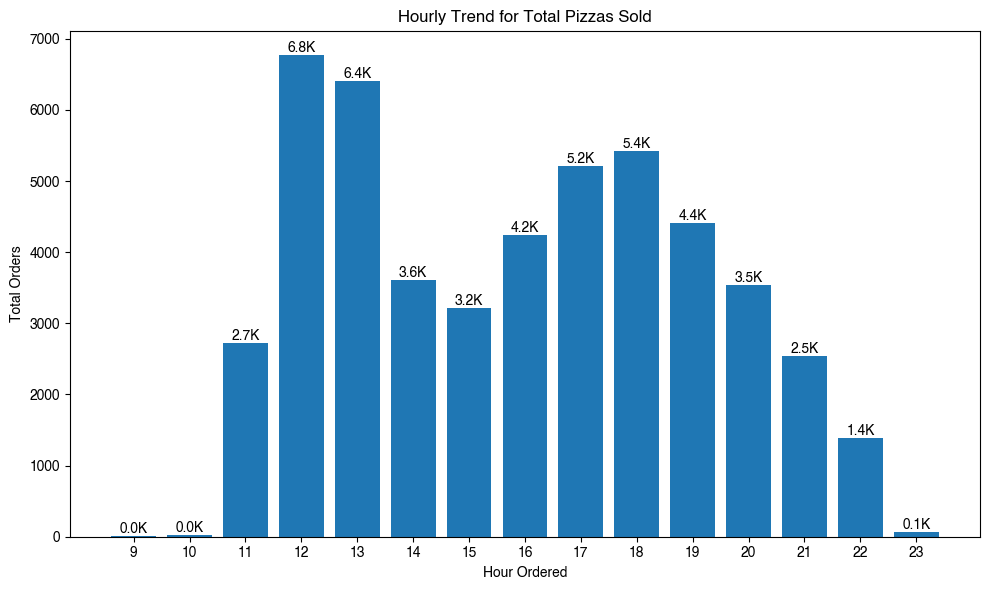

In [9]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(result_df['hour_ordered'], result_df['total_orders'])
plt.xlabel('Hour Ordered')
plt.ylabel('Total Orders')

# Format bar labels as '{total orders divided by 1000}K'
for i, total_orders in enumerate(result_df['total_orders']):
    label = f'{total_orders / 1000:.1f}K'
    plt.text(result_df['hour_ordered'][i], total_orders, label, ha='center', va='bottom')

plt.title('Hourly Trend for Total Pizzas Sold')
plt.xticks(result_df['hour_ordered'])
plt.tight_layout()
plt.show()

2. Weekly Trend for Total Orders

In [10]:
# Extract year and week from 'order_time', calculate total orders per week in each year
df['year_ordered'] = df['order_time'].dt.year
df['week_ordered'] = df['order_time'].dt.isocalendar().week  # Use isocalendar().week to get the week number
result_df = df.groupby(['year_ordered', 'week_ordered'])['order_id'].nunique().reset_index()
result_df.rename(columns={'order_id': 'total_orders'}, inplace=True)
result_df.sort_values(by=['year_ordered', 'week_ordered'], inplace=True)
result_df

,year_ordered,week_ordered,total_orders
0,2015,1,254
1,2015,2,427
2,2015,3,400
3,2015,4,415
4,2015,5,436
5,2015,6,422
6,2015,7,423
7,2015,8,393
8,2015,9,409
9,2015,10,420


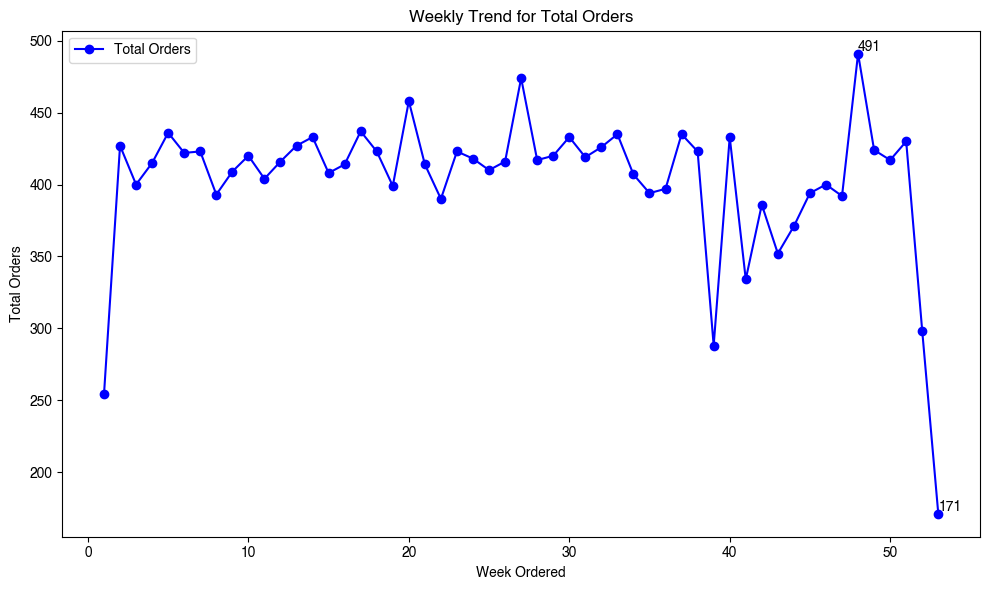

In [11]:
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(result_df['week_ordered'], result_df['total_orders'], color='blue', marker='o', label='Total Orders')
plt.xlabel('Week Ordered')
plt.ylabel('Total Orders')
plt.title('Weekly Trend for Total Orders')

# Get the maximum and minimum points
max_point = result_df.loc[result_df['total_orders'].idxmax()]
min_point = result_df.loc[result_df['total_orders'].idxmin()]

# Display data labels for maximum and minimum points
plt.text(max_point['week_ordered'], max_point['total_orders'], f'{max_point["total_orders"]}', ha='left', va='bottom')
plt.text(min_point['week_ordered'], min_point['total_orders'], f'{min_point["total_orders"]}', ha='left', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

3. Percentage of Sales by Pizza Category

In [12]:
# Calculate sales percentage for each category
sales_pct = (df.groupby('category')['total_price'].sum() / df['total_price'].sum()) * 100
sales_pct = sales_pct.round(2).reset_index(name='sales_pct')
sales_pct = sales_pct.sort_values(by='sales_pct', ascending=False).reset_index(drop = True)
sales_pct

,category,sales_pct
0,Classic,26.91
1,Supreme,25.46
2,Chicken,23.96
3,Veggie,23.68


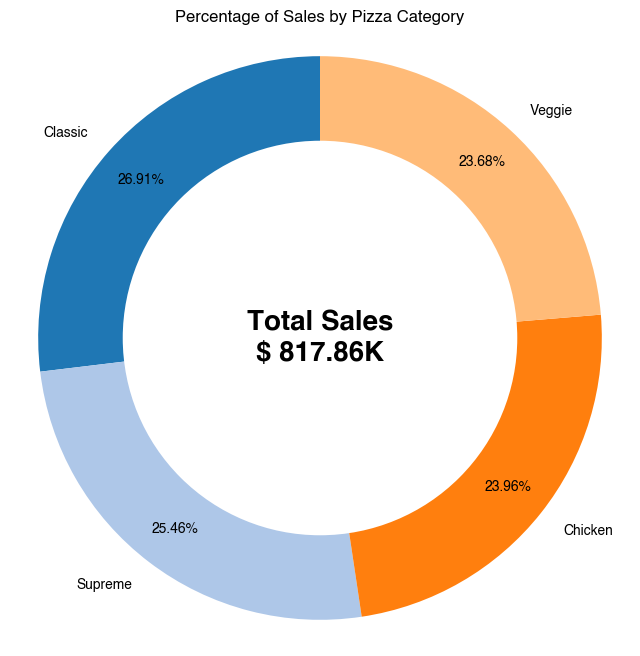

In [13]:
# Plotting donut chart
plt.figure(figsize=(8, 8))

# Outer circle (donut chart)
plt.pie(sales_pct['sales_pct'], labels=sales_pct['category'], autopct='%.2f%%', startangle=90, pctdistance=0.85, colors=plt.cm.tab20.colors)
plt.title('Percentage of Sales by Pizza Category')
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))

# Inner circle (total sales)
total_sales = round(df['total_price'].sum()/1000, 2)
plt.text(0, 0, f'Total Sales\n$ {total_sales}K', ha='center', va='center', fontsize=20, fontweight='bold')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

4. Percentage of Sales by Pizza Size

In [14]:
# Calculate sales percentage for each size
sales_pct = (df.groupby('size')['total_price'].sum() / df['total_price'].sum()) * 100
sales_pct = sales_pct.round(2).reset_index(name='sales_pct')
sales_pct = sales_pct.sort_values(by='sales_pct', ascending=False).reset_index(drop = True)
sales_pct

,size,sales_pct
0,Large,45.89
1,Medium,30.49
2,Small,21.77
3,X-Large,1.72
4,XX-Large,0.12


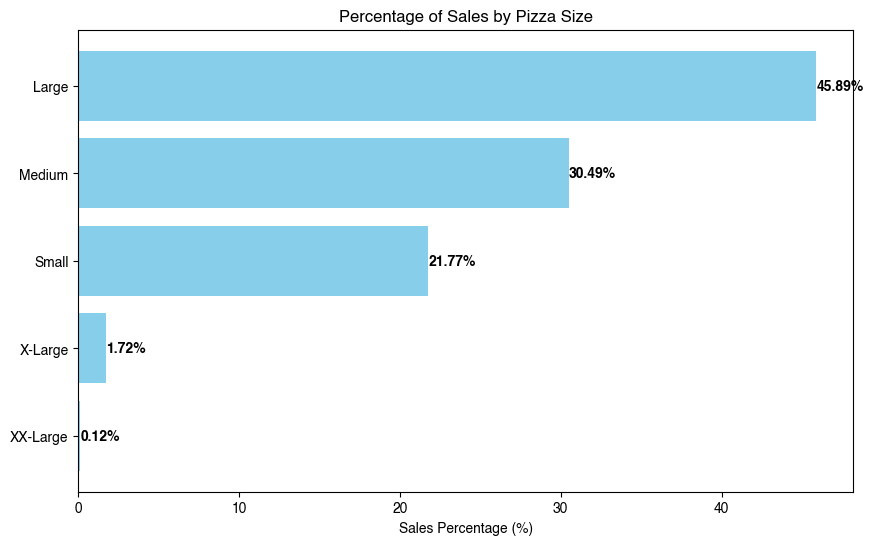

In [15]:
# Plotting horizontal bar chart with labels
plt.figure(figsize=(10, 6))
bars = plt.barh(sales_pct['size'], sales_pct['sales_pct'], color='skyblue')

# Add labels to the top of each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width()}%', ha='left', va='center', fontsize=10, fontweight = 'bold')

plt.xlabel('Sales Percentage (%)')
plt.title('Percentage of Sales by Pizza Size')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest percentage at the top
plt.show()


5. Total Pizzas Sold by Pizza Category

In [16]:
# Calculate total pizzas sold and total orders for each category
funnel_data = df.groupby('category').agg(total_pizzas=('quantity', 'sum'), total_orders=('order_id', 'nunique'))
funnel_data = funnel_data.sort_values(by='total_pizzas', ascending=False)
funnel_data

,total_pizzas,total_orders
category,,
Classic,14888,10859
Supreme,11987,9085
Veggie,11649,8941
Chicken,11050,8536


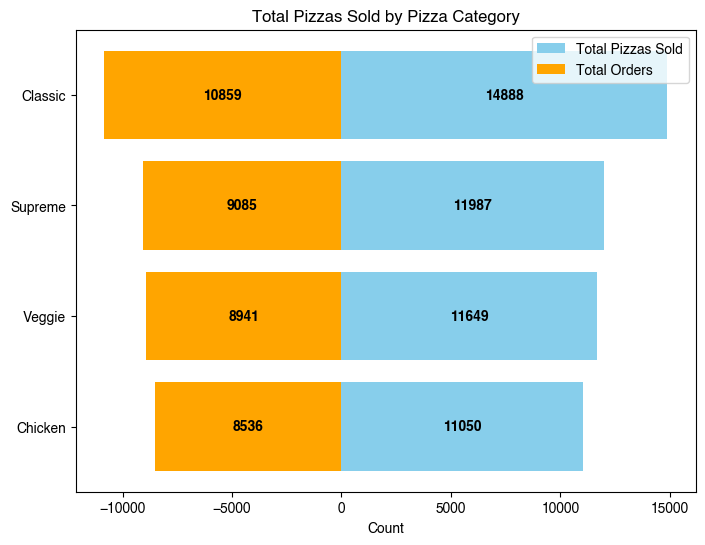

In [17]:
# Plotting funnel chart with labels in the middle of bars
plt.figure(figsize=(8, 6))

# Left side of the funnel (total pizzas sold)
bars1 = plt.barh(funnel_data.index, funnel_data['total_pizzas'], color='skyblue', label='Total Pizzas Sold')

# Right side of the funnel (total orders)
bars2 = plt.barh(funnel_data.index, -funnel_data['total_orders'], color='orange', label='Total Orders')

# Add labels in the middle of bars
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_width() / 2, bar1.get_y() + bar1.get_height() / 2, f'{int(bar1.get_width())}',
             ha='center', va='center', color='black', fontsize=10, fontweight = 'bold')
    plt.text(bar2.get_width() / 2, bar2.get_y() + bar2.get_height() / 2, f'{int(-bar2.get_width())}',
             ha='center', va='center', color='black', fontsize=10, fontweight = 'bold')

plt.xlabel('Count')
plt.title('Total Pizzas Sold by Pizza Category')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to display categories from top to bottom
plt.show()

6. Top 5 Best Sellers by Revenue, Total Quantity and Total Orders

In [18]:
# Group by 'name' and calculate the total price
top_5_revenue = df.groupby('name')['total_price'].sum()

# Rename the Series to 'total_revenue' and convert to DataFrame
top_5_revenue = top_5_revenue.rename('total_revenue').reset_index()

# Sort the DataFrame by 'total_revenue' in descending order and take the top 5
top_5_revenue = top_5_revenue.sort_values(by='total_revenue', ascending=False).reset_index(drop = True).head()

top_5_revenue

,name,total_revenue
0,The Thai Chicken Pizza,43434.25
1,The Barbecue Chicken Pizza,42768.00
2,The California Chicken Pizza,41409.50
3,The Classic Deluxe Pizza,38180.50
4,The Spicy Italian Pizza,34831.25


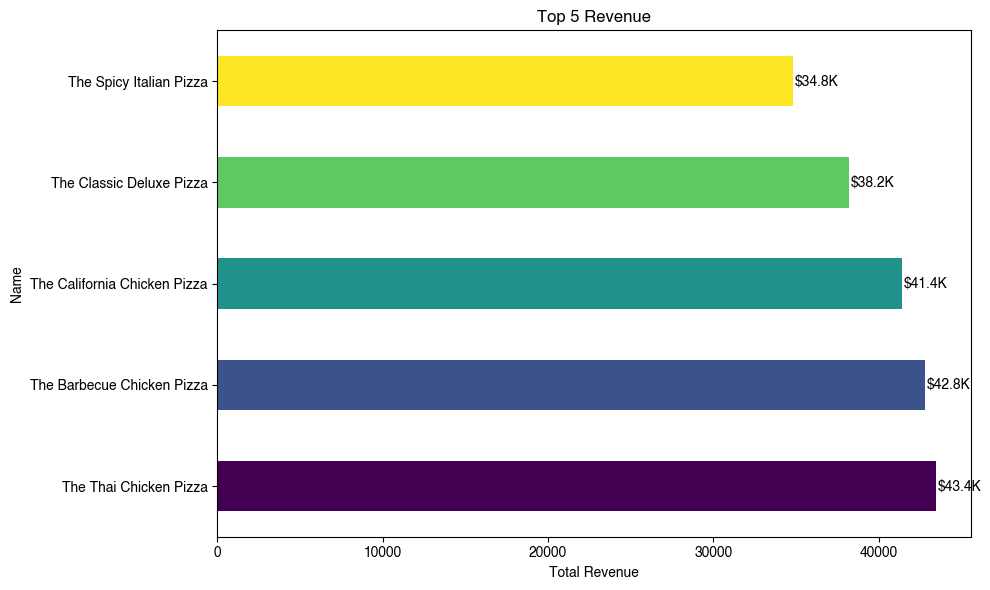

In [19]:
# Calculate revenue in thousands for labeling
top_5_revenue['revenue_in_k'] = top_5_revenue['total_revenue'] / 1000

# Create a color gradient for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(top_5_revenue)))

# Plot the horizontal bar chart with colored bars using Pandas plot function
ax = top_5_revenue.plot(kind='barh', x='name', y='total_revenue', color=colors, legend=None, figsize=(10, 6))

# Add labels at the right end of each bar
for p, revenue in zip(ax.patches, top_5_revenue['revenue_in_k']):
    ax.annotate(f'${revenue:.1f}K', (p.get_width() + 100, p.get_y() + p.get_height() / 2), va='center', fontsize=10)

# Customize plot labels and title
plt.xlabel('Total Revenue')
plt.ylabel('Name')
plt.title('Top 5 Revenue')
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
# Group by 'name' and calculate the total price
top_5_quantity = df.groupby('name')['quantity'].sum()

# Rename the Series to 'total_revenue' and convert to DataFrame
top_5_quantity = top_5_quantity.rename('total_quantity').reset_index()

# Sort the DataFrame by 'total_revenue' in descending order and take the top 5
top_5_quantity = top_5_quantity.sort_values(by='total_quantity', ascending=False).reset_index(drop = True).head()

top_5_quantity

,name,total_quantity
0,The Classic Deluxe Pizza,2453
1,The Barbecue Chicken Pizza,2432
2,The Hawaiian Pizza,2422
3,The Pepperoni Pizza,2418
4,The Thai Chicken Pizza,2371


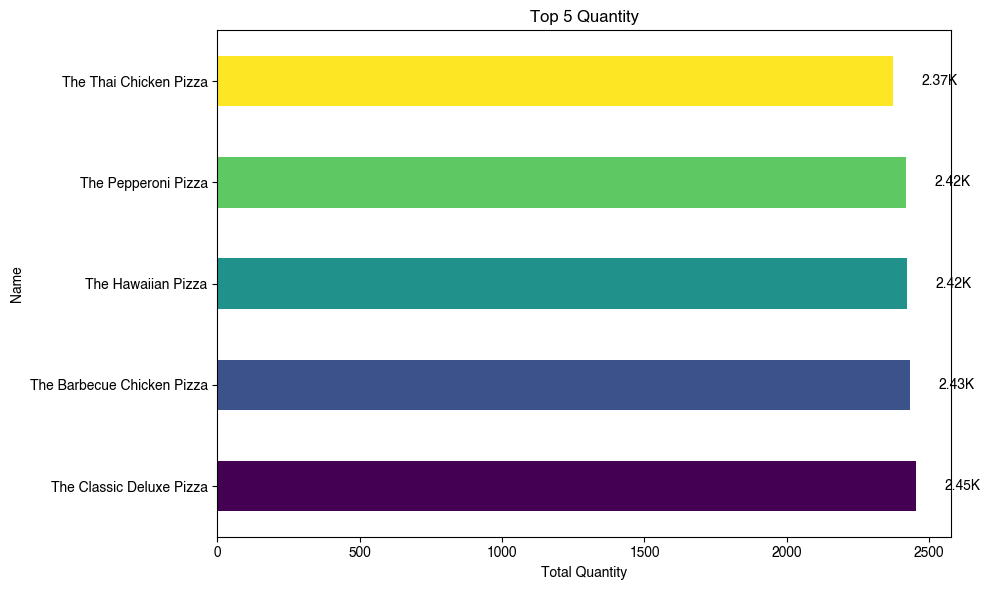

In [26]:
# Calculate revenue in thousands for labeling
top_5_quantity['quantity_in_k'] = top_5_quantity['total_quantity'] / 1000

# Create a color gradient for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(top_5_quantity)))

# Plot the horizontal bar chart with colored bars using Pandas plot function
ax = top_5_quantity.plot(kind='barh', x='name', y='total_quantity', color=colors, legend=None, figsize=(10, 6))

# Add labels at the right end of each bar
for p, quantity in zip(ax.patches, top_5_quantity['quantity_in_k']):
    ax.annotate(f'{quantity:.2f}K', (p.get_width() + 100, p.get_y() + p.get_height() / 2), va='center', fontsize=10)

# Customize plot labels and title
plt.xlabel('Total Quantity')
plt.ylabel('Name')
plt.title('Top 5 Quantity')
plt.tight_layout()

# Show the plot
plt.show()